In [165]:
%pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [166]:
import pandas as pd

In [167]:
df = pd.read_csv("Raw_Qsar.csv", sep=",")
df.columns

Index(['Molecule ChEMBL ID', 'Molecule Name', 'Molecule Max Phase',
       'Molecular Weight', '#RO5 Violations', 'AlogP', 'Compound Key',
       'Smiles', 'Standard Type', 'Standard Relation', 'Standard Value',
       'Standard Units', 'pChEMBL Value', 'Data Validity Comment', 'Comment',
       'Uo Units', 'Ligand Efficiency BEI', 'Ligand Efficiency LE',
       'Ligand Efficiency LLE', 'Ligand Efficiency SEI', 'Potential Duplicate',
       'Assay ChEMBL ID', 'Assay Description', 'Assay Type', 'BAO Format ID',
       'BAO Label', 'Assay Organism', 'Assay Tissue ChEMBL ID',
       'Assay Tissue Name', 'Assay Cell Type', 'Assay Subcellular Fraction',
       'Assay Parameters', 'Assay Variant Accession', 'Assay Variant Mutation',
       'Target ChEMBL ID', 'Target Name', 'Target Organism', 'Target Type',
       'Document ChEMBL ID', 'Source ID', 'Source Description',
       'Document Journal', 'Document Year', 'Cell ChEMBL ID', 'Properties',
       'Action Type', 'Standard Text Value', 'V

In [168]:
df[['Molecule ChEMBL ID', 'Smiles', 'pChEMBL Value']] # 0r just use df.head(10)


,Molecule ChEMBL ID,Smiles,pChEMBL Value
0,CHEMBL311262,CC(C)[C@H](NC(=O)[C@@H](N)CCC(=O)O)C(=O)N[C@@H...,7.31
1,CHEMBL49971,CC(C)C[C@H](NC(=O)C(O)c1ccccc1Br)[C@@H](O)CC(=...,4.40
2,CHEMBL297910,CC(C)CC(NC(=O)C(O)c1cccc2ccccc12)[C@@H](O)CC(=...,5.40
3,CHEMBL381826,CC(C)C[C@H](NC(=O)[C@@H](NC(=O)[C@@H](N)CNC(=O...,8.32
4,CHEMBL1824337,CN1C(=O)C(c2cccc(-c3cccnc3F)c2)(c2cnn(CCF)c2)N...,7.30
...,...,...,...
1995,CHEMBL2349619,NaN,NaN
1996,CHEMBL2349618,NaN,NaN
1997,CHEMBL4126351,CO[C@]1(C)OC[C@@](C)(c2cc(NC(=O)c3ncc(C#N)cc3C...,7.80
1998,CHEMBL4516189,O=C(CN1CCC(C(c2ccccc2)c2ccccc2)CC1)NC1CCN(Cc2c...,4.26


In [169]:
df=df[['Molecule ChEMBL ID', 'Smiles', 'pChEMBL Value']]

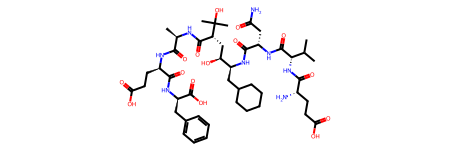

In [170]:
import rdkit
from rdkit import Chem
from rdkit.Chem import Descriptors
m = Chem.MolFromSmiles(df['Smiles'][0])
m

In [171]:
Descriptors.TPSA(m)

396.07

In [172]:
Descriptors.MolWt(m)

977.1230000000002

In [173]:
df = df.dropna()
df['Mol']=df['Smiles'].apply(Chem.MolFromSmiles)

In [174]:
df.isna().sum()

Molecule ChEMBL ID    0
Smiles                0
pChEMBL Value         0
Mol                   0
dtype: int64

In [175]:
df=df.dropna()

In [176]:
df= df.reset_index(drop=True)

In [177]:
df['Molwt'] = df['Mol'].apply(Descriptors.MolWt)
df['LogP'] = df['Mol'].apply(Descriptors.MolLogP)
df['nHA']= df['Mol'].apply(Descriptors.NumHAcceptors)
df['nHD']= df['Mol'].apply(Descriptors.NumHDonors)
df['nHD']= df['Mol'].apply(Descriptors.NumHDonors)
df['CSP3']= df['Mol'].apply(Descriptors.FractionCSP3)
df['Ringcount']= df['Mol'].apply(Descriptors.RingCount)
df['TPSA']= df['Mol'].apply(Descriptors.TPSA)
df['NumAromaRing']= df['Mol'].apply(Descriptors.NumAromaticRings)
df['ALHC']= df['Mol'].apply(Descriptors.NumAliphaticHeterocycles)

In [178]:
X = df[['Molwt', 'LogP', 'nHA', 'nHD', 'CSP3', 'Ringcount', 'TPSA', 'NumAromaRing', 'ALHC']]

In [179]:
y= df['pChEMBL Value']

BUILDING MODEL

In [180]:
from sklearn.model_selection import train_test_split  

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=0
)

X_train.head()


,Molwt,LogP,nHA,nHD,CSP3,Ringcount,TPSA,NumAromaRing,ALHC
1334,706.907,2.81424,9,5,0.617647,2,200.04,2,0
1003,547.762,3.49530,6,3,0.551724,2,107.97,2,0
1428,689.917,2.17730,9,7,0.812500,0,212.26,0,0
1357,431.418,2.93350,6,2,0.333333,3,113.39,2,1
1678,500.083,4.76780,5,3,0.571429,4,83.48,2,1


In [181]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

In [182]:
model

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [183]:
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [184]:
y_test

1366    5.43
568     8.70
1686    8.07
1291    6.82
1364    6.85
        ... 
1042    6.17
1480    5.14
997     6.34
1146    8.00
187     7.82
Name: pChEMBL Value, Length: 178, dtype: float64

In [185]:
pred_y_test = model.predict(X_test)
pred_y_test


array([7.7831    , 7.78949333, 7.56924   , 6.51616667, 7.5389    ,
       6.83066667, 7.4662    , 7.191375  , 7.72713   , 6.716525  ,
       7.26319667, 5.64146667, 5.57557667, 5.56515   , 6.8429    ,
       6.50155   , 6.4374    , 6.07076667, 6.66387333, 5.64366667,
       6.34738667, 5.89034167, 7.168125  , 7.33552833, 7.51456667,
       5.90359167, 4.05949167, 5.8804    , 6.86189167, 8.04074167,
       6.47047667, 6.82971667, 7.99425   , 7.39693333, 6.10285   ,
       7.794075  , 7.22666667, 7.0386    , 6.83264167, 7.33553333,
       7.10905   , 5.85525333, 6.74654833, 6.059275  , 6.5932    ,
       7.6075    , 6.08895   , 7.73088333, 6.327385  , 6.28065   ,
       7.1344    , 6.5524    , 6.3538    , 5.5474    , 7.14305   ,
       6.21763667, 6.3342    , 7.26893333, 6.63195   , 6.64500762,
       6.86936667, 6.7637    , 7.0418    , 6.031775  , 6.31413619,
       6.6696    , 6.03561048, 7.05366833, 6.67483333, 7.115255  ,
       6.53765   , 5.88495   , 6.3678    , 5.4935    , 5.10488

In [186]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, root_mean_squared_error
mae= mean_absolute_error(y_test, pred_y_test)
mse= mean_squared_error(y_test, pred_y_test)
rmse= root_mean_squared_error(y_test, pred_y_test)
r2_score= root_mean_squared_error(y_test, pred_y_test)


In [187]:
mae

0.7607034236222581

In [188]:
mse

0.8977731639625752

In [189]:
rmse

0.9475089255318787

In [190]:
r2_score

0.9475089255318787

In [191]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [192]:
import matplotlib.pyplot as plt

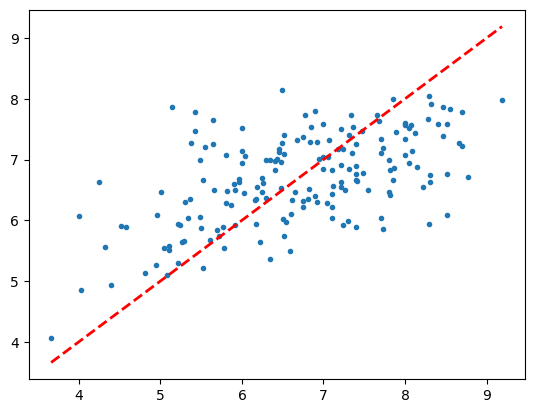

In [193]:
plt.plot(y_test, pred_y_test, '.')
min_val = min(y_test.min(), pred_y_test.min())
max_val = max(y_test.max(), pred_y_test.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Perfect Prediction (y=x)')

TESTING EXTERNAL MODEL

In [194]:
Lstat_df= pd.read_csv('Lanabetecestat_similarity.csv')
Lstat_df

,Compound_CID,SMILES
0,67979346,CC#CC1=CC(=CN=C1)C2=CC3=C(CC4([C@]35N=C(C(=N5)...
1,57404290,CC#CC1=CC(=CN=C1)C2=CC3=C(CC4(C35N=C(C(=N5)N)C...
2,57387166,CCC#CC1=CC(=CN=C1)C2=CC3=C(CC4(C35N=C(C(=N5)N)...
3,67979331,CC1=NC2(C3=C(CC24CCC(CC4)OC)C=CC(=C3)C5=CC(=CN...
4,71548079,CC#CC1=CC(=CN=C1)C2=CC3=C(CC4(C35C=C(C(=N5)N)F...
...,...,...
139,175747139,CC#CC1=CC(=CN=C1)C2=CC3=C(C=C2)C4CCCC(C4C35N=C...
140,73507225,C[C@@H]1CC2(C[C@@H](C1OC)C)CC3=C([C@@]24N=C(C(...
141,73507226,CC[C@@H]1C[C@]2(CC[C@H]1OC)CC3=C([C@@]24N=C(C(...
142,73507227,CC[C@H]1C[C@@]2(CC[C@@H]1OC)CC3=C([C@@]24N=C(C...


In [195]:
Lstat_df=Lstat_df[['Compound_CID', 'SMILES']]

In [196]:
Lstat_df['Mol']=df['Smiles'].apply(Chem.MolFromSmiles)

In [197]:
Lstat_df['Molwt'] = Lstat_df['Mol'].apply(Descriptors.MolWt)
Lstat_df['LogP'] = Lstat_df['Mol'].apply(Descriptors.MolLogP)
Lstat_df['nHA']= Lstat_df['Mol'].apply(Descriptors.NumHAcceptors)
Lstat_df['nHD']= Lstat_df['Mol'].apply(Descriptors.NumHDonors)
Lstat_df['nHD']= Lstat_df['Mol'].apply(Descriptors.NumHDonors)
Lstat_df['CSP3']= Lstat_df['Mol'].apply(Descriptors.FractionCSP3)
Lstat_df['Ringcount']= Lstat_df['Mol'].apply(Descriptors.RingCount)
Lstat_df['TPSA']= Lstat_df['Mol'].apply(Descriptors.TPSA)
Lstat_df['NumAromaRing']= Lstat_df['Mol'].apply(Descriptors.NumAromaticRings)
Lstat_df['ALHC']= Lstat_df['Mol'].apply(Descriptors.NumAliphaticHeterocycles)
Lstat_df


,Compound_CID,SMILES,Mol,Molwt,LogP,nHA,nHD,CSP3,Ringcount,TPSA,NumAromaRing,ALHC
0,67979346,CC#CC1=CC(=CN=C1)C2=CC3=C(CC4([C@]35N=C(C(=N5)...,<rdkit.Chem.rdchem.Mol object at 0x000001C565B...,977.123,-1.06080,13,13,0.652174,2,396.07,1,0
1,57404290,CC#CC1=CC(=CN=C1)C2=CC3=C(CC4(C35N=C(C(=N5)N)C...,<rdkit.Chem.rdchem.Mol object at 0x000001C5664...,620.541,2.91980,6,6,0.448276,2,165.06,2,0
2,57387166,CCC#CC1=CC(=CN=C1)C2=CC3=C(CC4(C35N=C(C(=N5)N)...,<rdkit.Chem.rdchem.Mol object at 0x000001C5666...,805.926,1.96230,9,9,0.452381,3,260.56,3,0
3,67979331,CC1=NC2(C3=C(CC24CCC(CC4)OC)C=CC(=C3)C5=CC(=CN...,<rdkit.Chem.rdchem.Mol object at 0x000001C5666...,732.807,-1.16430,13,9,0.424242,4,300.67,4,0
4,71548079,CC#CC1=CC(=CN=C1)C2=CC3=C(CC4(C35C=C(C(=N5)N)F...,<rdkit.Chem.rdchem.Mol object at 0x000001C5666...,396.401,2.08400,6,1,0.200000,4,89.40,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...
139,175747139,CC#CC1=CC(=CN=C1)C2=CC3=C(C=C2)C4CCCC(C4C35N=C...,<rdkit.Chem.rdchem.Mol object at 0x000001C5666...,562.755,3.89490,5,4,0.545455,4,110.77,2,1
140,73507225,C[C@@H]1CC2(C[C@@H](C1OC)C)CC3=C([C@@]24N=C(C(...,<rdkit.Chem.rdchem.Mol object at 0x000001C5666...,494.636,2.77400,5,5,0.464286,3,119.56,2,0
141,73507226,CC[C@@H]1C[C@]2(CC[C@H]1OC)CC3=C([C@@]24N=C(C(...,<rdkit.Chem.rdchem.Mol object at 0x000001C5666...,877.994,-2.14510,12,12,0.600000,1,367.64,1,0
142,73507227,CC[C@H]1C[C@@]2(CC[C@@H]1OC)CC3=C([C@@]24N=C(C...,<rdkit.Chem.rdchem.Mol object at 0x000001C5666...,587.752,5.17472,5,3,0.575758,3,90.90,2,1


In [198]:
x_Lstat = Lstat_df[['Molwt', 'LogP', 'nHA', 'nHD', 'CSP3', 'Ringcount', 'TPSA', 'NumAromaRing', 'ALHC']]

In [199]:
pred_Lstat= model.predict(x_Lstat)

In [200]:
pred_Lstat

array([7.18255   , 5.4899    , 5.2467    , 8.2092    , 7.18312667,
       6.9886    , 7.33552833, 7.7011    , 5.766     , 7.7119    ,
       7.8203    , 7.28515   , 5.8331    , 7.13653333, 6.0303    ,
       5.4043    , 5.357075  , 6.83915   , 5.7426    , 7.17646667,
       5.88495   , 7.41743333, 5.64233333, 6.91319167, 6.04543143,
       7.2131    , 6.8949    , 6.6674    , 6.50176667, 6.0599    ,
       6.31413619, 4.67321333, 6.0321    , 7.5573    , 6.03561048,
       6.527045  , 6.527045  , 7.17825619, 7.3662    , 7.57875   ,
       5.92633333, 5.5691    , 5.5747    , 6.716625  , 7.33801   ,
       5.41892   , 5.21675   , 5.10488333, 6.4939    , 5.5076    ,
       5.8557    , 6.63674667, 8.79972595, 5.8461    , 6.3673    ,
       7.30069238, 7.1651    , 6.5911    , 6.7636    , 7.1126    ,
       5.5291    , 6.66472833, 5.0717    , 6.2211    , 6.21763667,
       8.03794667, 7.4715    , 7.15502   , 5.30483333, 6.0556    ,
       5.6586    , 6.95214667, 5.8785    , 8.15657143, 7.94832

In [201]:
Lstat_df['Predictions']= pred_Lstat
Lstat_df

,Compound_CID,SMILES,Mol,Molwt,LogP,nHA,nHD,CSP3,Ringcount,TPSA,NumAromaRing,ALHC,Predictions
0,67979346,CC#CC1=CC(=CN=C1)C2=CC3=C(CC4([C@]35N=C(C(=N5)...,<rdkit.Chem.rdchem.Mol object at 0x000001C565B...,977.123,-1.06080,13,13,0.652174,2,396.07,1,0,7.182550
1,57404290,CC#CC1=CC(=CN=C1)C2=CC3=C(CC4(C35N=C(C(=N5)N)C...,<rdkit.Chem.rdchem.Mol object at 0x000001C5664...,620.541,2.91980,6,6,0.448276,2,165.06,2,0,5.489900
2,57387166,CCC#CC1=CC(=CN=C1)C2=CC3=C(CC4(C35N=C(C(=N5)N)...,<rdkit.Chem.rdchem.Mol object at 0x000001C5666...,805.926,1.96230,9,9,0.452381,3,260.56,3,0,5.246700
3,67979331,CC1=NC2(C3=C(CC24CCC(CC4)OC)C=CC(=C3)C5=CC(=CN...,<rdkit.Chem.rdchem.Mol object at 0x000001C5666...,732.807,-1.16430,13,9,0.424242,4,300.67,4,0,8.209200
4,71548079,CC#CC1=CC(=CN=C1)C2=CC3=C(CC4(C35C=C(C(=N5)N)F...,<rdkit.Chem.rdchem.Mol object at 0x000001C5666...,396.401,2.08400,6,1,0.200000,4,89.40,3,1,7.183127
...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,175747139,CC#CC1=CC(=CN=C1)C2=CC3=C(C=C2)C4CCCC(C4C35N=C...,<rdkit.Chem.rdchem.Mol object at 0x000001C5666...,562.755,3.89490,5,4,0.545455,4,110.77,2,1,6.610883
140,73507225,C[C@@H]1CC2(C[C@@H](C1OC)C)CC3=C([C@@]24N=C(C(...,<rdkit.Chem.rdchem.Mol object at 0x000001C5666...,494.636,2.77400,5,5,0.464286,3,119.56,2,0,4.958850
141,73507226,CC[C@@H]1C[C@]2(CC[C@H]1OC)CC3=C([C@@]24N=C(C(...,<rdkit.Chem.rdchem.Mol object at 0x000001C5666...,877.994,-2.14510,12,12,0.600000,1,367.64,1,0,6.091900
142,73507227,CC[C@H]1C[C@@]2(CC[C@@H]1OC)CC3=C([C@@]24N=C(C...,<rdkit.Chem.rdchem.Mol object at 0x000001C5666...,587.752,5.17472,5,3,0.575758,3,90.90,2,1,6.909458


In [202]:
Lstat_df.to_csv('compounds_to_dock.csv')
Lstat_df

,Compound_CID,SMILES,Mol,Molwt,LogP,nHA,nHD,CSP3,Ringcount,TPSA,NumAromaRing,ALHC,Predictions
0,67979346,CC#CC1=CC(=CN=C1)C2=CC3=C(CC4([C@]35N=C(C(=N5)...,<rdkit.Chem.rdchem.Mol object at 0x000001C565B...,977.123,-1.06080,13,13,0.652174,2,396.07,1,0,7.182550
1,57404290,CC#CC1=CC(=CN=C1)C2=CC3=C(CC4(C35N=C(C(=N5)N)C...,<rdkit.Chem.rdchem.Mol object at 0x000001C5664...,620.541,2.91980,6,6,0.448276,2,165.06,2,0,5.489900
2,57387166,CCC#CC1=CC(=CN=C1)C2=CC3=C(CC4(C35N=C(C(=N5)N)...,<rdkit.Chem.rdchem.Mol object at 0x000001C5666...,805.926,1.96230,9,9,0.452381,3,260.56,3,0,5.246700
3,67979331,CC1=NC2(C3=C(CC24CCC(CC4)OC)C=CC(=C3)C5=CC(=CN...,<rdkit.Chem.rdchem.Mol object at 0x000001C5666...,732.807,-1.16430,13,9,0.424242,4,300.67,4,0,8.209200
4,71548079,CC#CC1=CC(=CN=C1)C2=CC3=C(CC4(C35C=C(C(=N5)N)F...,<rdkit.Chem.rdchem.Mol object at 0x000001C5666...,396.401,2.08400,6,1,0.200000,4,89.40,3,1,7.183127
...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,175747139,CC#CC1=CC(=CN=C1)C2=CC3=C(C=C2)C4CCCC(C4C35N=C...,<rdkit.Chem.rdchem.Mol object at 0x000001C5666...,562.755,3.89490,5,4,0.545455,4,110.77,2,1,6.610883
140,73507225,C[C@@H]1CC2(C[C@@H](C1OC)C)CC3=C([C@@]24N=C(C(...,<rdkit.Chem.rdchem.Mol object at 0x000001C5666...,494.636,2.77400,5,5,0.464286,3,119.56,2,0,4.958850
141,73507226,CC[C@@H]1C[C@]2(CC[C@H]1OC)CC3=C([C@@]24N=C(C(...,<rdkit.Chem.rdchem.Mol object at 0x000001C5666...,877.994,-2.14510,12,12,0.600000,1,367.64,1,0,6.091900
142,73507227,CC[C@H]1C[C@@]2(CC[C@@H]1OC)CC3=C([C@@]24N=C(C...,<rdkit.Chem.rdchem.Mol object at 0x000001C5666...,587.752,5.17472,5,3,0.575758,3,90.90,2,1,6.909458
